<a href="https://colab.research.google.com/github/SandeepH2706/IITM_MLT/blob/main/Week_4_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week-4: Part-1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## Sampling

Sampling from a distribution is an important skill. While learning ML, it is often a good idea to work with toy-datasets. These toy-datasets can be generated from well known distributions such as the Bernoulli and Gaussian. The next section will introduce the idea of sampling in NumPy.

### Random number generator

We can sample from distributions with the help of a random number generator:

In [2]:
rng = np.random.default_rng()

We will start by generating a dataset of ones and zeros. The following code generates a sample of size $10$.

In [3]:
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 10)
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Notice that we have used a seed value as an argument to the random number generator. This is meant to ensure reproducability. That is, no matter how many times this cell is run, we will get the same sequence of random numbers. First run the cell a few times to verify that this is true. Now, run the cell with a different seed value and see what happens.

## Problem-1

For the dataset `X` given below, what is the maximum likelihood estimate of the mean if we use a Bernoulli distribution with parameter $p$ to model this data? Perform all your operations in the cell given below. Do not change the seed value. Enter your answer correct to three decimal places.

In [19]:
### Data ###
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 1000)
### Solution ###

In [20]:
mle_mean = X.mean()
# Print the answer correct to three decimal places.
print(f"{mle_mean:.3f}")

0.506


What happens if we increase the size of the dataset to $10000$? We see that `np.integers` is only giving us observations from a discrete uniform distribution. In other words, if you think about it as a coin toss, the coin is unbiased. How do we generate samples from a biased coin or a Bernoulli distribution with $p \neq 0.5$? We use a method called `choice`. This method "chooses" numbers from a list or an array based on the probabilities given to it in the array `p`.

In [16]:
rng = np.random.default_rng(seed = 1001)
X = rng.choice([0, 1], size = 10000, p = [0.2, 0.8])
mle_mean = X.mean()
print(f"{mle_mean:.3f}")

0.797


Note that the array `p` specifies the probabilities of $0$ and $1$.

## Problem-2

Sample $1000$ points from a  Bernoulli distribution whose parameter is $p = 0.7$. Compute the maximum likelihood estimate of the parameter given this sample. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

**Note**:

- The parameter $p$ of a Bernoulli distribution always points to $P(x = 1)$.

- It may seem pointless to compute the MLE when the parameter is already known to us. But this is a good exercise to verify our understanding of concepts with such toy-datasets.

In [22]:
p = 0.7
### RNG ###
rng = np.random.default_rng(seed=1001) # You can set a seed here if you need reproducibility
sample = rng.choice([0, 1], size=1000, p=[1-p, p])

mle_p = sample.mean()
# Print the answer correct to three decimal places
print(f"{mle_p:.3f}")

0.707


## Problem-3

Plot a bar graph of the above sample. You can use the `plt.bar` method. To know more about a method in Google Colab type `plt.bar?` in a cell and run it.

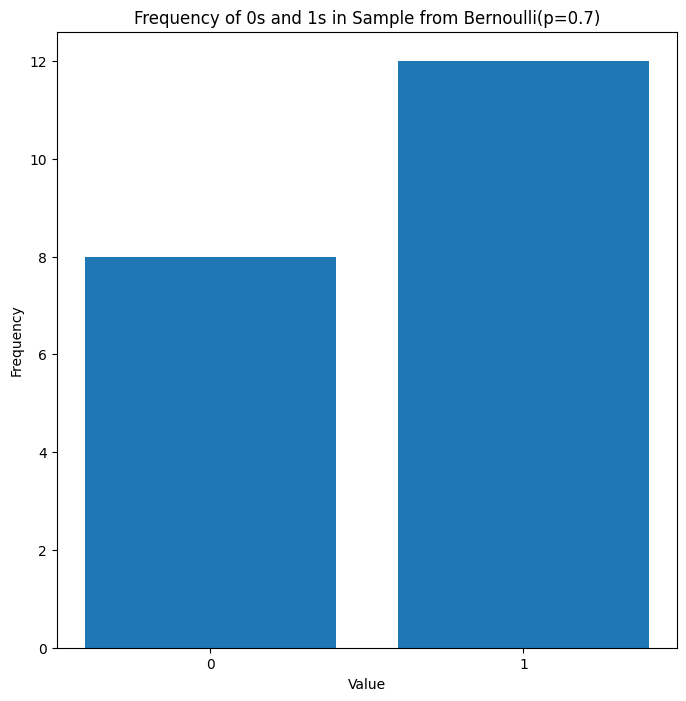

In [15]:
# Calculate the counts of 0s and 1s in the sample
counts_p2 = np.bincount(X)

# Create labels for the bars
labels_p2 = ['0', '1']

# Plot the bar graph
plt.bar(labels_p2, counts_p2)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Frequency of 0s and 1s in Sample from Bernoulli(p=0.7)')
plt.show()

## Problem-4

What is the impact of the size of the dataset on the MLE? Generate datasets of the following sizes:

- $n = 10$
- $n = 100$
- $n = 1000$
- $n = 10000$
- $n = 100000$
- $n = 1000000$

Sample each dataset from a Bernoulli distribution with parameter $p = 0.2$. For each dataset, first compute the MLE and then compute the difference (abs value) between the MLE and the true parameter. That is, compute the value $d$ for different values of $n$

$$
d(n) = |\hat{p}_{ML} - p|
$$

Plot $d(n)$ with respect to $n$. What do you osbserve?


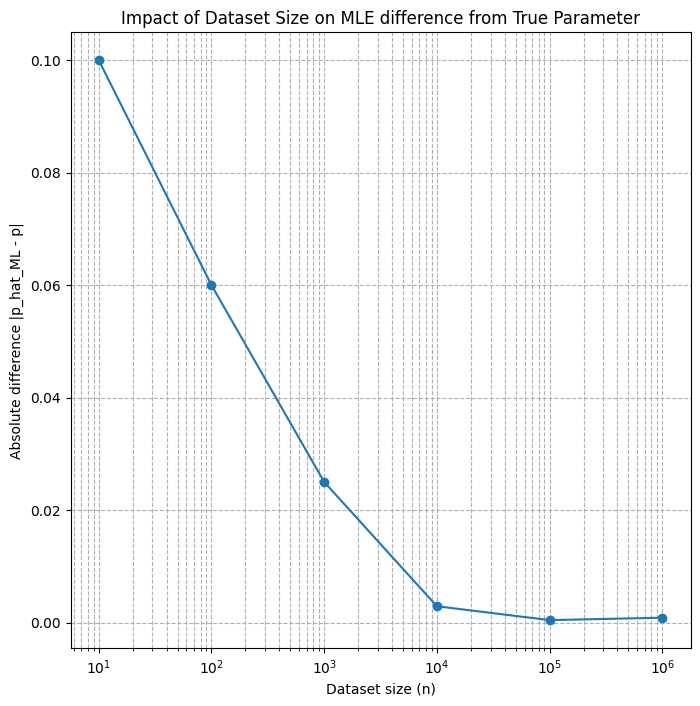

In [23]:
n_values = [10, 100, 1000, 10000, 100000, 1000000]
true_p = 0.2
differences = []
rng = np.random.default_rng(seed=1001)
for n in n_values:
  sample = rng.choice([0, 1], size=n, p=[1 - true_p, true_p])
  mle_p = sample.mean()
  difference = abs(mle_p - true_p)
  differences.append(difference)
plt.plot(n_values, differences, marker='o')
plt.xscale('log')  # Use a logarithmic scale for the x-axis to better visualize the trend
plt.xlabel('Dataset size (n)')
plt.ylabel('Absolute difference |p_hat_ML - p|')
plt.title('Impact of Dataset Size on MLE difference from True Parameter')
plt.grid(True, which="both", ls="--")
plt.show()
# Observation: As the dataset size (n) increases, the absolute difference between the Maximum Likelihood Estimate (MLE) and the true parameter (p) decreases.
#This demonstrates the consistency property of the MLE: as the sample size grows, the MLE converges to the true parameter value.

## Problem-5

Sample $1000$ points from a six sided, biased die with faces: $1, 2, 3, 4, 5, 6$. The parameters corresponding to the six faces are:

$$
[0.1, 0.2, 0.3, 0.3, 0.05, 0.05]
$$

Note that this is a categorical distribution. Refer to the practice assignment for a similar problem. Find the maximum likelihood estimate of the parameter $p_3$ (corresponds to the third face). Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

In [24]:
# Parameters for the six faces
parameters = [0.1, 0.2, 0.3, 0.3, 0.05, 0.05]

# Ensure the probabilities sum to 1 (or close to 1 due to floating point precision)
print(f"Sum of parameters: {sum(parameters):.3f}")

# Define the faces of the die
faces = [1, 2, 3, 4, 5, 6]

# Set a seed for reproducibility
rng = np.random.default_rng(seed=1001)

# Sample 1000 points from the biased die
sample_die = rng.choice(faces, size=1000, p=parameters)

# To find the MLE of p3 (the probability of rolling a 3), we count the number of times 3 appears in the sample
# and divide by the total number of samples.
count_3 = np.sum(sample_die == 3)

# Calculate the MLE of p3
mle_p3 = count_3 / len(sample_die)

# Print the answer correct to three decimal places
print(f"{mle_p3:.3f}")

Sum of parameters: 1.000
0.319


## Problem-6

Plot the bar graph for the above sample.

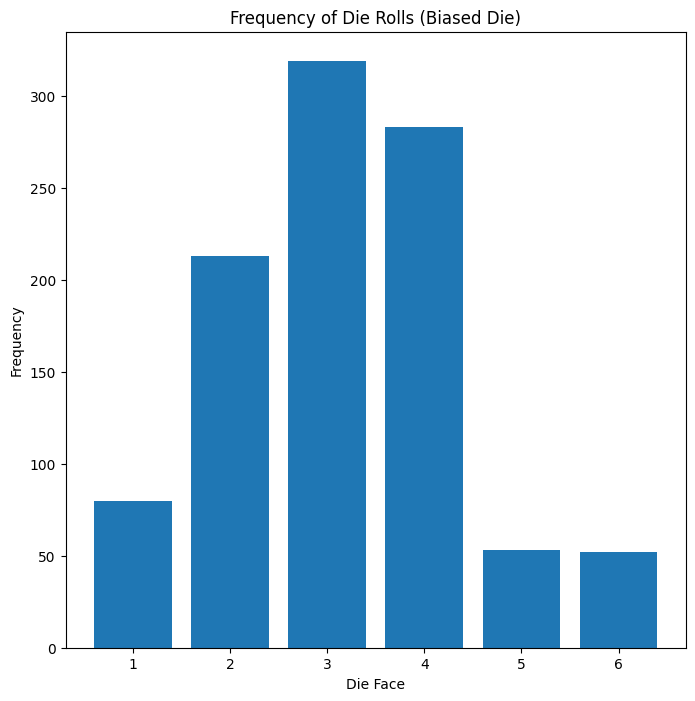

In [27]:
## Solution ##
# Calculate the counts for each face
counts_die = np.bincount(sample_die)

# Since bincount starts counting from 0 and our faces are 1-6,
# the index corresponds to face - 1. We need to use the faces as labels.
labels_die = faces # [1, 2, 3, 4, 5, 6]

counts_for_plot = counts_die[1:]

# Plot the bar graph
plt.bar(labels_die, counts_for_plot)
plt.xlabel('Die Face')
plt.ylabel('Frequency')
plt.title('Frequency of Die Rolls (Biased Die)')
plt.xticks(labels_die) # Ensure x-axis ticks correspond to faces
plt.show()

We now move to the Gaussian distribution. First, we shall get used to computing the density of a Gaussian given its mean and variance.

## Problem-7

Consider the following Gaussian distribution:

$$
\mathcal{N}(3, 1.5^2)
$$

Compute the density of the point $5$ with respect to this distribution. Enter your answer correct to three decimal places.

In [28]:
## Solution ##
import scipy.stats as stats
# Mean of the distribution
mu = 3
# Standard deviation of the distribution
sigma = 1.5
# The point at which to compute the density
point = 5
# Create a Gaussian distribution object
gaussian_dist = stats.norm(loc=mu, scale=sigma)
# Compute the probability density function (PDF) at the given point
density = gaussian_dist.pdf(point)
# Print the answer correct to three decimal places
print(f"{density:.3f}")

0.109


Now, we shall move to sampling from a Gaussian distribution.

## Problem-8

Generate a dataset of $1000$ points from a Gaussian distribution with mean $3$ and standard deviation $1.5$. Find the maximum likelihood estimate of the mean for this dataset. Enter your answer correct to three decimal places. Use the cell given below for all your computations. You can search for the method to use from the NumPy docs. It is quite similar to what we did for the case of the Bernoulli and categorical distributions.

In [29]:
# Mean and standard deviation of the Gaussian distribution
mu = 3
sigma = 1.5
# Number of data points to generate
n_samples = 1000
# Set a seed for reproducibility
rng = np.random.default_rng(seed=1001)
# Generate the dataset
gaussian_sample = rng.normal(loc=mu, scale=sigma, size=n_samples)
# The maximum likelihood estimate of the mean for a Gaussian distribution
# is the sample mean.
mle_mean_gaussian = gaussian_sample.mean()
# Print the answer correct to three decimal places
print(f"{mle_mean_gaussian:.3f}")

2.944


## Problem-9

Plot the histogram of the dataset given above. Use the `plt.hist` method.

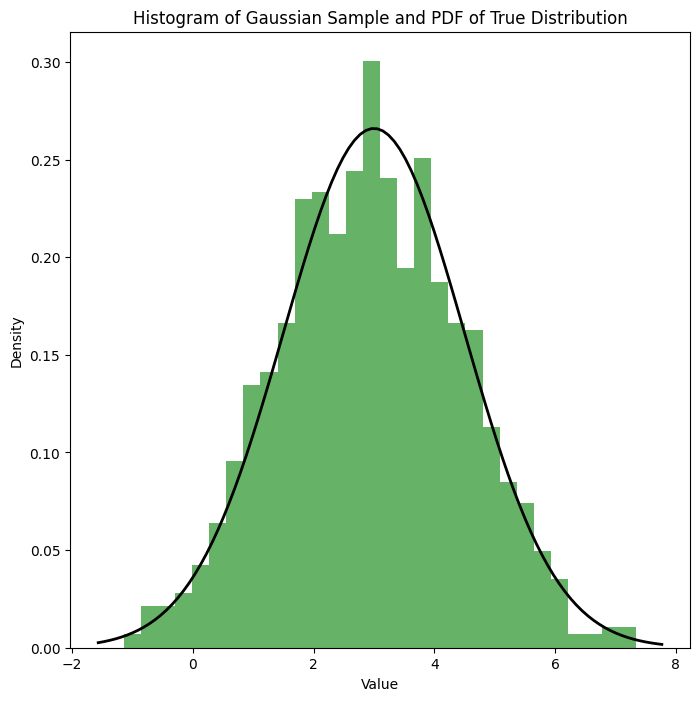

In [31]:
## Solution ##
# Plot the histogram of the Gaussian sample
plt.hist(gaussian_sample, bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF) of the true distribution for comparison
# This part is optional but helps visualize how well the histogram approximates the true distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

title = "Histogram of Gaussian Sample and PDF of True Distribution"
plt.title(title)
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

We will now turn to understanding the shapes of the Beta distribution for different values of parameters $\alpha$ and $\beta$.

## Problem-10

Plot the beta distribution for the following values:

- $\alpha = 5, \beta = 5$
- $\alpha = 5, \beta = 1.5$
- $\alpha = 1.5, \beta = 5$
- $\alpha = 0.5, \beta = 0.5$


Do not worry about the normalization constant. Use `plt.subplot(2, 2, i)` to plot all four distributions in a single figure. `i` should take the values 1, 2, 3 and 4 for these four subplots. If you are not sure how it works, google it. Stackoverflow will be of great help here.

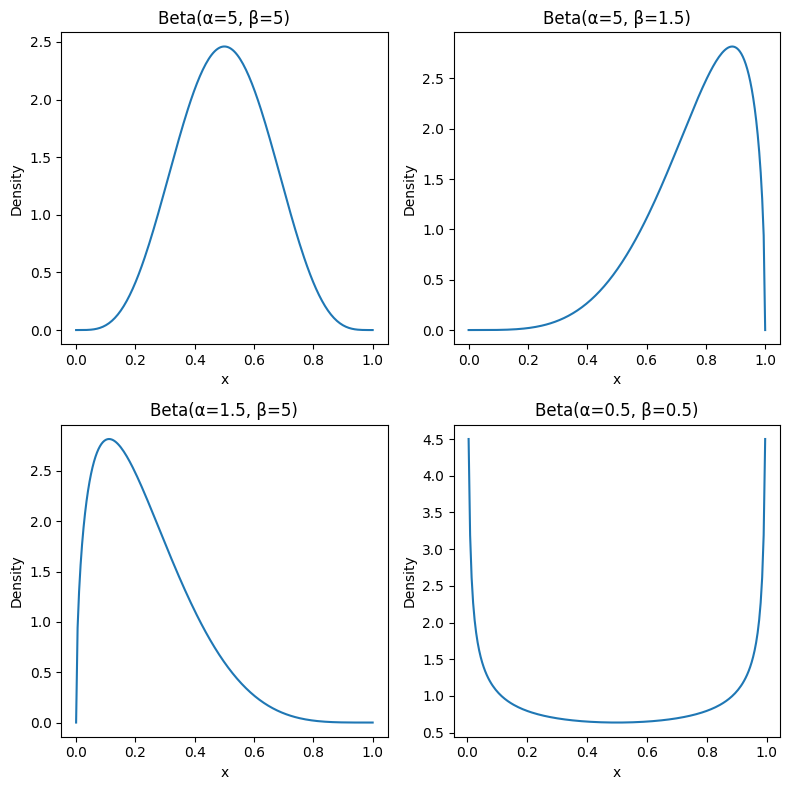

In [32]:
## Solution ##
# Values for alpha and beta
params = [(5, 5), (5, 1.5), (1.5, 5), (0.5, 0.5)]

# Create a range of x values for the plots
x = np.linspace(0, 1, 200)

# Plot the Beta distributions
for i, (alpha, beta) in enumerate(params):
  plt.subplot(2, 2, i + 1)  # Create subplot (2 rows, 2 columns, current plot index i+1)
  # Calculate the probability density function for the Beta distribution
  pdf = stats.beta.pdf(x, alpha, beta)
  plt.plot(x, pdf)
  plt.title(f'Beta(α={alpha}, β={beta})')
  plt.xlabel('x')
  plt.ylabel('Density')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()